In [3]:
import os
import json
from shapely.geometry import Polygon
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# LUCAS soil (2009)

## Define AOI

In [6]:
# File path to the Utrecht polygon CSV file
utrecht_polygon_path = '/Users/Administrator/Documents/University/Year 3/2b/Thesis/Bachelor-Thesis/data/raw/utrecht polygon.csv'
df_poly = pd.read_csv(utrecht_polygon_path, sep=';')

In [4]:
# Load the LUCAS soil dataset from the Excel file
file_path = '/Users/Administrator/Documents/University/Year 3/2b/Thesis/Bachelor-Thesis/data/raw/lucas soil data/LUCAS_TOPSOIL_v1.xlsx'
lucas_df = pd.read_excel(file_path)

# Preview column names
lucas_df.columns

Index(['POINT_ID', 'coarse', 'clay', 'silt', 'sand', 'pH_in_H2O',
       'pH_in_CaCl2', 'OC', 'CaCO3', 'N', 'P', 'K', 'CEC', 'Notes',
       'sample_ID', 'GPS_LAT', 'GPS_LONG'],
      dtype='object')

In [7]:
nl_df = lucas_df[
    (lucas_df["GPS_LAT"] >= 50.75) & (lucas_df["GPS_LAT"] <= 53.6) &
    (lucas_df["GPS_LONG"] >= 3.2) & (lucas_df["GPS_LONG"] <= 7.2)
].copy()

geometry = [Point(xy) for xy in zip(nl_df["GPS_LONG"], nl_df["GPS_LAT"])]
gdf_nl = gpd.GeoDataFrame(nl_df, geometry=geometry, crs="EPSG:4326")

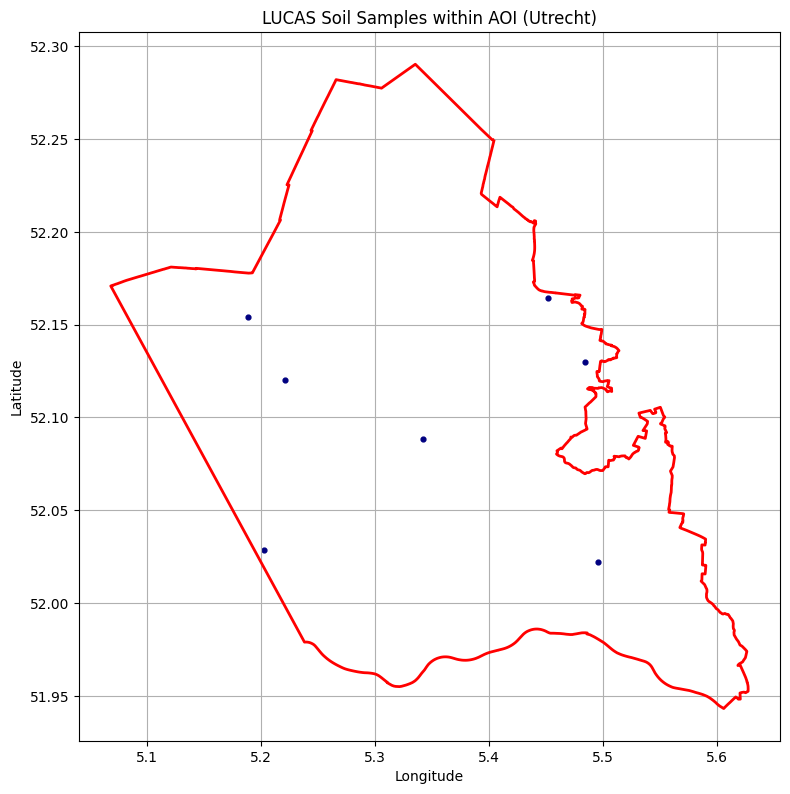

7

In [8]:
# Parse the polygon from the GeoJSON-like structure
geo_shape_str = df_poly.loc[0, "Geo Shape"]
geo_shape = json.loads(geo_shape_str)
coords = geo_shape["coordinates"][0]
utrecht_polygon = Polygon(coords)

# Define boundary diagonal
x1, y1 = 5.066884, 52.170366
x2, y2 = 5.237030, 51.978896

# Define filter logic
def is_above_line(x, y):
    if x1 == x2:
        return y > y1
    slope = (y2 - y1) / (x2 - x1)
    y_on_line = slope * (x - x1) + y1
    return (y > y_on_line) and (x > x1)

# Filter coords
filtered_coords = [(x, y) for x, y in utrecht_polygon.exterior.coords if is_above_line(x, y)]
if filtered_coords[0] != filtered_coords[-1]:
    filtered_coords.append(filtered_coords[0])

# Create new AOI polygon
aoi = Polygon(filtered_coords)
aoi_gdf = gpd.GeoDataFrame(geometry=[aoi], crs="EPSG:4326")

# Filter LUCAS NL points to this AOI
lucas_in_aoi = gdf_nl[gdf_nl.geometry.within(aoi)]

# Plot
fig, ax = plt.subplots(figsize=(8, 10))
aoi_gdf.boundary.plot(ax=ax, color="red", linewidth=2)
lucas_in_aoi.plot(ax=ax, color="navy", markersize=12)
ax.set_title("LUCAS Soil Samples within AOI (Utrecht)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid(True)
plt.tight_layout()
plt.show()

# Return count
lucas_in_aoi.shape[0]


In [9]:
lucas_in_aoi = gdf_nl[gdf_nl.geometry.within(aoi)]

In [10]:
lucas_in_aoi

,POINT_ID,coarse,clay,silt,sand,pH_in_H2O,pH_in_CaCl2,OC,CaCO3,N,P,K,CEC,Notes,sample_ID,GPS_LAT,GPS_LONG,geometry
12713,40123234,4,3,5,92,3.92,3.18,26.4,1.0,1.5,23.4,32.5,4.1,NaN,15740,52.12959,5.48450,POINT (5.4845 52.12959)
12714,40123222,3,3,5,92,3.83,3.22,32.4,0.0,1.8,55.4,17.1,6.1,NaN,15611,52.02195,5.49526,POINT (5.49526 52.02195)
12720,40103238,2,4,8,88,6.60,6.01,15.2,1.0,1.3,67.4,83.6,6.7,NaN,15742,52.16433,5.45152,POINT (5.45152 52.16433)
12757,40023230,2,2,2,97,3.92,3.09,9.7,1.0,0.9,0.0,20.5,2.9,NaN,15612,52.08810,5.34238,POINT (5.34238 52.0881)
12794,39943234,3,2,4,95,3.89,3.05,28.3,1.0,1.3,0.0,18.5,3.6,NaN,15741,52.12014,5.22088,POINT (5.22088 52.12014)
12805,39923238,4,3,6,91,5.71,5.10,28.5,2.0,2.1,139.0,51.8,7.5,NaN,15744,52.15397,5.18898,POINT (5.18898 52.15397)
12806,39923224,8,65,30,5,6.79,6.16,55.7,6.0,6.0,37.8,264.1,56.5,NaN,15610,52.02848,5.20244,POINT (5.20244 52.02848)


# LUCAS 2018

In [11]:
lucas_2018_path = '/Users/Administrator/Documents/University/Year 3/2b/Thesis/Bachelor-Thesis/data/raw/lucas soil data/LUCAS-SOIL-2018-data-report-readme-v2/LUCAS-SOIL-2018-v2/LUCAS-SOIL-2018.csv'
lucas_2018_df = pd.read_csv(lucas_2018_path)

# Show columns to identify relevant ones for filtering and geometry
lucas_2018_df.columns

Index(['Depth', 'POINTID', 'pH_CaCl2', 'pH_H2O', 'EC', 'OC', 'CaCO3', 'P', 'N',
       'K', 'OC (20-30 cm)', 'CaCO3 (20-30 cm)', 'Ox_Al', 'Ox_Fe', 'NUTS_0',
       'NUTS_1', 'NUTS_2', 'NUTS_3', 'TH_LAT', 'TH_LONG', 'SURVEY_DATE',
       'Elev', 'LC', 'LU', 'LC0_Desc', 'LC1_Desc', 'LU1_Desc'],
      dtype='object')

In [12]:
lucas_nl_2018 = lucas_2018_df[
    (lucas_2018_df["TH_LAT"] >= 50.75) & (lucas_2018_df["TH_LAT"] <= 53.6) &
    (lucas_2018_df["TH_LONG"] >= 3.2) & (lucas_2018_df["TH_LONG"] <= 7.2)
].copy()

In [13]:
geometry_2018 = [Point(xy) for xy in zip(lucas_nl_2018["TH_LONG"], lucas_nl_2018["TH_LAT"])]
gdf_nl_2018 = gpd.GeoDataFrame(lucas_nl_2018, geometry=geometry_2018, crs="EPSG:4326")

# Preview the data
gdf_nl_2018.head()

,Depth,POINTID,pH_CaCl2,pH_H2O,EC,OC,CaCO3,P,N,K,...,TH_LAT,TH_LONG,SURVEY_DATE,Elev,LC,LU,LC0_Desc,LC1_Desc,LU1_Desc,geometry
449,0-20 cm,39303122,6.8,7.30,50.36,42.2,22,250,3,462.7,...,51.074736,4.414867,22-08-18,46,B16,U111,Cropland,Maize,Agriculture (excluding fallow land and kitchen...,POINT (4.41487 51.07474)
450,0-20 cm,39443132,5.7,6.34,7.15,20.6,NaN,57.5,1.8,223.7,...,51.173777,4.603690,24-08-18,51,B74,U111,Cropland,Nuts trees,Agriculture (excluding fallow land and kitchen...,POINT (4.60369 51.17378)
451,0-20 cm,39443158,5.5,6.23,12.34,20.4,NaN,74.2,2,114.3,...,51.406739,4.576201,21-08-18,64,E30,U112,Grassland,Spontaneously re-vegetated surfaces,Fallow land,POINT (4.5762 51.40674)
452,0-20 cm,39543124,3.9,4.55,11.79,19.8,NaN,37.3,1.5,148.6,...,51.108624,4.754540,25-08-18,54,B16,U111,Cropland,Maize,Agriculture (excluding fallow land and kitchen...,POINT (4.75454 51.10862)
453,0-20 cm,39543150,3.3,4.25,9.64,54.7,2,37.1,3.6,67.3,...,51.341630,4.727874,21-08-18,70,C10,U120,Woodland,Broadleaved woodland,Forestry,POINT (4.72787 51.34163)


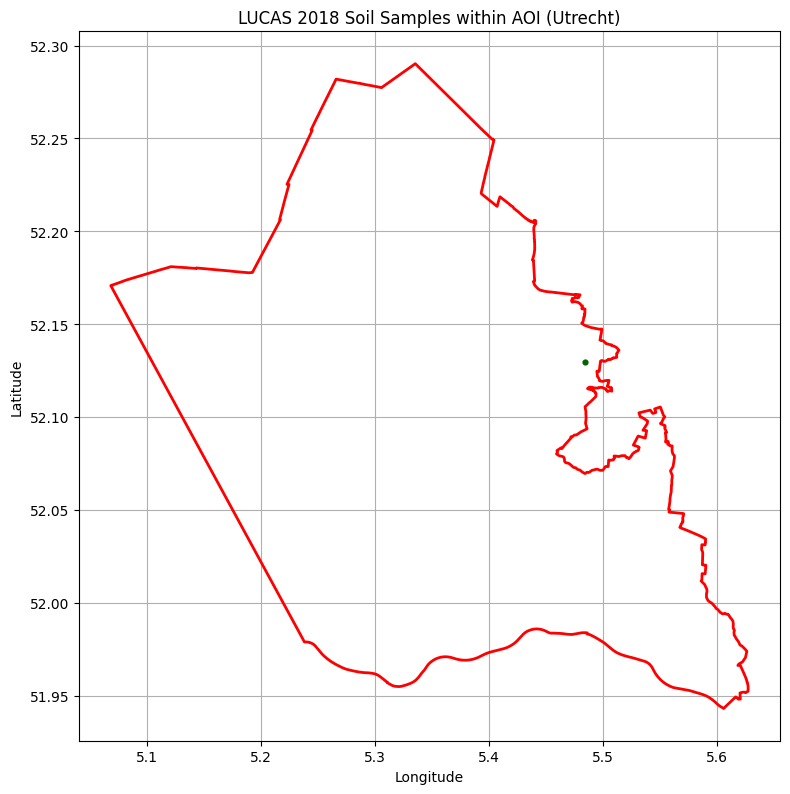

1

In [14]:
lucas_2018_in_aoi = gdf_nl_2018[gdf_nl_2018.geometry.within(aoi)]

# Plot AOI and filtered LUCAS points
fig, ax = plt.subplots(figsize=(8, 10))
aoi_gdf.boundary.plot(ax=ax, color="red", linewidth=2)
lucas_2018_in_aoi.plot(ax=ax, color="darkgreen", markersize=12)
ax.set_title("LUCAS 2018 Soil Samples within AOI (Utrecht)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.grid(True)
plt.tight_layout()
plt.show()

# Return how many points are inside the AOI
lucas_2018_in_aoi.shape[0]